# Predicting Dengue Disease Spread
## Capstone Project - Machine Learning Engineer Nanodegree
### Giulia Martielli

A competition held by DrivenData.org:
https://www.drivendata.org/competitions/44/dengai-predicting-disease-spread/

<img src="https://images.unsplash.com/photo-1572262086204-3909bfc93ea0?ixlib=rb-1.2.1&ixid=MXwxMjA3fDB8MHxwaG90by1wYWdlfHx8fGVufDB8fHw%3D&auto=format&fit=crop&w=751&q=80" alt="Drawing" style="width: 2000px;height: 600px"/>

### Problem Statement

Dengue Fever (**DF**) is a systemic and dynamic infection with a broad clinical spectrum that includes both serious and non-serious clinical manifestations is carried by mosquitos. Its transmission is higly correlated with climate variables, especially temperature and precipitation / humidity. The task of the competition is to predict the number of dengue cases each week (in each of the two locations – San Juan and Iquitos) based on all the environmental variables provided (temperature, precipitation, vegetation, and more).<br>
From a technical point of view, the goal is to predict the `total_cases label` for each triplet (`city`, `year`, `weekofyear`) in the test set.

### Datasets and Inputs

The data for this project are downloaded directly from DrivenData.org (https://www.drivendata.org/competitions/44/dengai-predicting-disease-spread/page/81/). In addition to the number of cases in the two locations, the data include, as previously mentioned, information on temperature, precipitation, humidity, vegetation, and what time of the year the data was obtained. Below a detailed list and description of datasets provided and features - the provided set of information are on a (`year, weekofyear`) timescale, where appropriate, units are provided as a `_unit` suffix on the feature name).<br>


#### Datasets
* `dengue_labels_train.csv` (1,457 rows) containing four columns being city (`sj` for San Juan and `iq` for Iquitos), year (ranging from 1990 to 2008 for San Juan and from 2000 to 2010 for Iquitos), `weekofyear` (ranging from 1 to 53) and `total_cases` (the number of cases/week for each city)
* `dengue_features_train.csv` (1,457 rows) containing data for both San Juan (years ranging from 1990 to 2008) and Iquitos (years ranging from 2000 to 2010), plus all the relevant features, for a total of 24 columns
* `dengue_features_test.csv` (417 rows) containing data for both San Juan (years ranging from 2008 to 2013) and Iquitos (years ranging from 2010 to 2013), plus all the relevant features, for a total of 24 columns; as reported on the DrivenData.org website, “the test set is a pure future hold-out, meaning the test data are sequential and non-overlapping with any of the training data"

#### Features

***City and date indicators***
*   `city` – City abbreviations: sj for San Juan and iq for Iquitos
*   `week_start_date` – Date given in yyyy-mm-dd format

***NOAA's GHCN daily climate data weather station measurements***
•	station_max_temp_c – Maximum temperature

*   `station_min_temp_c` – Minimum temperature
*   `station_avg_temp_c` – Average temperature
*	  `station_precip_mm` – Total precipitation
*	  `station_diur_temp_rng_c` – Diurnal temperature range


***PERSIANN satellite precipitation measurements (0.25x0.25 degree scale)***
*   `precipitation_amt_mm` – Total precipitation


***NOAA's NCEP Climate Forecast System Reanalysis measurements (0.5x0.5 degree scale)***
*   `reanalysis_sat_precip_amt_mm` – Total precipitation
*   `reanalysis_dew_point_temp_k` – Mean dew point temperature
*   `reanalysis_air_temp_k` – Mean air temperature
*   `reanalysis_relative_humidity_percent` – Mean relative humidity
*   `reanalysis_specific_humidity_g_per_kg` – Mean specific humidity
*   `reanalysis_precip_amt_kg_per_m2` – Total precipitation
*   `reanalysis_max_air_temp_k `– Maximum air temperature
*   `reanalysis_min_air_temp_k` – Minimum air temperature
*   `reanalysis_avg_temp_k` – Average air temperature
*   `reanalysis_tdtr_k` – Diurnal temperature range


***Satellite vegetation - Normalized difference vegetation index (NDVI) - NOAA's CDR Normalized Difference Vegetation Index (0.5x0.5 degree scale) measurements***
*   `ndvi_se` – Pixel southeast of city centroid
*   `ndvi_sw` – Pixel southwest of city centroid
*   `ndvi_ne` – Pixel northeast of city centroid
*   `ndvi_nw` – Pixel northwest of city centroid


### Evaluation Metrics
The evaluation metric suggested for the DrivenData.org competition is the _**M**ean **A**bsolute **E**rror_ (**MAE**), which is a model evaluation metric usually used with regression models.

<h1><center> Analysis </center></h1>

## Upload data and libraries

Importing data and all needed libraries

In [45]:
import pandas as pd
import numpy as np
import seaborn as sns
sns.set_style('darkgrid')
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
from sklearn.impute import SimpleImputer

%matplotlib inline

plt.style.use('bmh')
pd.options.display.max_rows = 200

In [7]:
df_train = pd.read_csv('data/dengue_features_train.csv') 
df_test = pd.read_csv('data/dengue_features_test.csv') 
dl_train = pd.read_csv('data/dengue_labels_train.csv',sep=';')

In [8]:
df_train=df_train.merge(dl_train,on=['city','year','weekofyear'],how='inner')

## Exploratory Data Analysis

Get a quick introduction of our datasets

In [9]:
## Train set
df_train.dtypes

city                                      object
year                                       int64
weekofyear                                 int64
week_start_date                           object
ndvi_ne                                  float64
ndvi_nw                                  float64
ndvi_se                                  float64
ndvi_sw                                  float64
precipitation_amt_mm                     float64
reanalysis_air_temp_k                    float64
reanalysis_avg_temp_k                    float64
reanalysis_dew_point_temp_k              float64
reanalysis_max_air_temp_k                float64
reanalysis_min_air_temp_k                float64
reanalysis_precip_amt_kg_per_m2          float64
reanalysis_relative_humidity_percent     float64
reanalysis_sat_precip_amt_mm             float64
reanalysis_specific_humidity_g_per_kg    float64
reanalysis_tdtr_k                        float64
station_avg_temp_c                       float64
station_diur_temp_rn

In [10]:
## Test set
df_test.dtypes

city                                      object
year                                       int64
weekofyear                                 int64
week_start_date                           object
ndvi_ne                                  float64
ndvi_nw                                  float64
ndvi_se                                  float64
ndvi_sw                                  float64
precipitation_amt_mm                     float64
reanalysis_air_temp_k                    float64
reanalysis_avg_temp_k                    float64
reanalysis_dew_point_temp_k              float64
reanalysis_max_air_temp_k                float64
reanalysis_min_air_temp_k                float64
reanalysis_precip_amt_kg_per_m2          float64
reanalysis_relative_humidity_percent     float64
reanalysis_sat_precip_amt_mm             float64
reanalysis_specific_humidity_g_per_kg    float64
reanalysis_tdtr_k                        float64
station_avg_temp_c                       float64
station_diur_temp_rn

In [11]:
## Train set
df_train.describe()

,year,weekofyear,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,reanalysis_avg_temp_k,reanalysis_dew_point_temp_k,...,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm,total_cases
count,1451.000000,1451.000000,1262.000000,1404.000000,1434.000000,1434.000000,1443.000000,1446.000000,1446.000000,1446.000000,...,1446.000000,1443.000000,1446.000000,1446.000000,1413.000000,1413.000000,1436.000000,1442.000000,1434.000000,1451.000000
mean,2001.026878,26.412130,0.142294,0.130553,0.203783,0.202305,45.760388,298.701852,299.225578,295.246356,...,82.161959,45.760388,16.746427,4.903754,27.185783,8.059328,32.452437,22.102150,39.326360,24.685734
std,5.406124,14.964361,0.140531,0.119999,0.073860,0.083903,43.715537,1.362420,1.261715,1.527810,...,7.153897,43.715537,1.542494,3.546445,1.292347,2.128568,1.959318,1.574066,47.455314,43.653121
min,1990.000000,1.000000,-0.406250,-0.456100,-0.015533,-0.063457,0.000000,294.635714,294.892857,289.642857,...,57.787143,0.000000,11.715714,1.357143,21.400000,4.528571,26.700000,14.700000,0.000000,0.000000
25%,1997.000000,13.000000,0.044950,0.049217,0.155087,0.144209,9.800000,297.658929,298.257143,294.118929,...,77.177143,9.800000,15.557143,2.328571,26.300000,6.514286,31.100000,21.100000,8.700000,5.000000
50%,2002.000000,26.000000,0.128817,0.121429,0.196050,0.189450,38.340000,298.646429,299.289286,295.640714,...,80.301429,38.340000,17.087143,2.857143,27.414286,7.300000,32.800000,22.200000,23.850000,12.000000
75%,2005.000000,39.000000,0.248483,0.216600,0.248846,0.246982,70.235000,299.833571,300.207143,296.460000,...,86.357857,70.235000,17.978214,7.625000,28.157143,9.566667,33.900000,23.300000,53.900000,28.000000
max,2010.000000,52.000000,0.508357,0.454429,0.538314,0.546017,390.600000,302.200000,302.928571,298.450000,...,98.610000,390.600000,20.461429,16.028571,30.800000,15.800000,42.200000,25.600000,543.300000,461.000000


In [12]:
# Test set
df_test.describe()

,year,weekofyear,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,reanalysis_avg_temp_k,reanalysis_dew_point_temp_k,...,reanalysis_precip_amt_kg_per_m2,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm
count,416.000000,416.000000,373.000000,405.000000,415.000000,415.000000,414.000000,414.000000,414.000000,414.000000,...,414.000000,414.000000,414.000000,414.000000,414.000000,404.000000,404.000000,413.000000,407.000000,411.000000
mean,2010.766827,26.439904,0.126050,0.126803,0.207702,0.201721,38.354324,298.818295,299.353071,295.419179,...,42.171135,82.499810,38.354324,16.927088,5.124569,27.369587,7.810991,32.534625,22.368550,34.278589
std,1.434835,14.978257,0.164353,0.141420,0.079102,0.092028,35.171126,1.469501,1.306233,1.523099,...,48.909514,7.378243,35.171126,1.557868,3.542870,1.232608,2.449718,1.920429,1.731437,34.655966
min,2008.000000,1.000000,-0.463400,-0.211800,0.006200,-0.014671,0.000000,294.554286,295.235714,290.818571,...,0.000000,64.920000,0.000000,12.537143,1.485714,24.157143,4.042857,27.200000,14.200000,0.000000
25%,2010.000000,13.750000,-0.001500,0.015975,0.148670,0.134079,8.175000,297.751429,298.323214,294.335714,...,9.430000,77.397143,8.175000,15.792857,2.446429,26.514286,5.928571,31.100000,21.200000,9.100000
50%,2011.000000,26.000000,0.110100,0.088700,0.204171,0.186471,31.455000,298.547143,299.328571,295.825000,...,25.850000,80.330000,31.455000,17.337143,2.914286,27.483333,6.642857,32.800000,22.200000,23.600000
75%,2012.000000,39.000000,0.263329,0.242400,0.254871,0.253243,57.772500,300.240357,300.521429,296.643571,...,56.475000,88.328929,57.772500,18.174643,8.171429,28.319048,9.812500,33.900000,23.300000,47.750000
max,2013.000000,53.000000,0.500400,0.649000,0.453043,0.529043,169.340000,301.935714,303.328571,297.794286,...,301.400000,97.982857,169.340000,19.598571,14.485714,30.271429,14.725000,38.400000,26.700000,212.000000


Check if there is any **difference between the two cities** San Juan and Iquitos

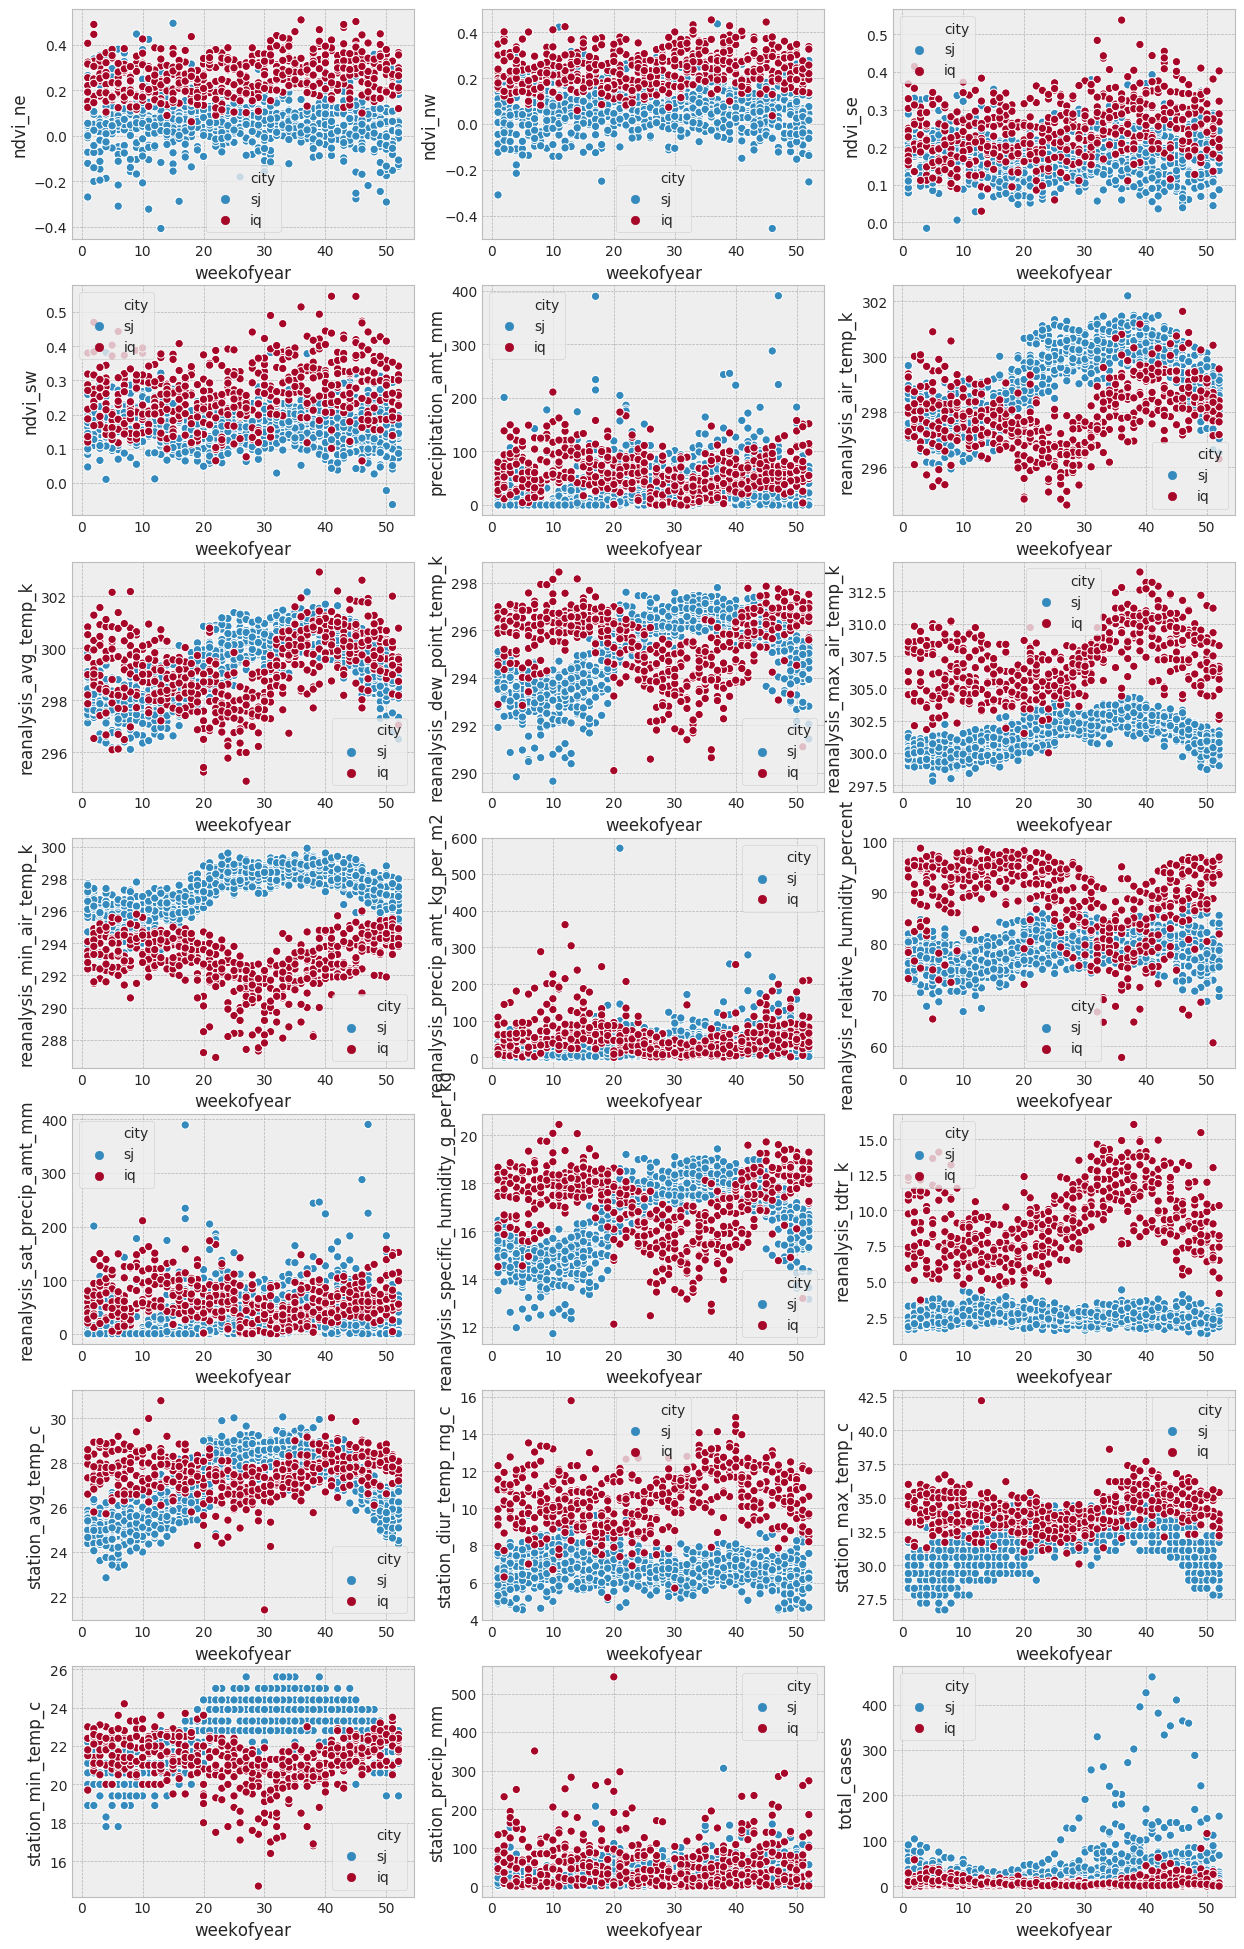

In [78]:
df_train_num = df_train.drop(columns=['year','week_start_date'])

figure(num=None, figsize=(15, 25), dpi=100)
count = 1
for i in range(0,len(df_train_num.columns)-2):
    plt.subplot(7,3,count)
    sns.scatterplot(x="weekofyear", y=df_train_num.columns[i+2],hue="city",data=df_train_num)
    count+=1
    
plt.show()

The distributions of the variables for the two cities in scope seems very different from each other. Probably due to the fact that San Juan belongs to the Northern hemisphere and Iquitos belongs to the Southern hemisphere. In fact, all the variables related to the distribution of vegetation, and those related to humidity, temperature and precipitation seem to have almost an **opposite behavior** in the two cities with respect to the weeks of the year. For example, in San Juan average temperatures are highest around week 30 of the year (full summer in the Northern hemisphere), as well as humidity is lowest in this period; while on the contrary in Iquitos, the average temperature is highest around weeks 52-1 (corresponding to summer in the Southern hemisphere), as well as humidity is lowest in the same period. 

**_For this reason I decide to treat the two cities separately from now on and fit models separately on them._**

## 1) Separare le città 2) Studiare la variabile target + correlazioni singole 3) correlazioni totali

## Data Pre-processing

Check for **missing values** and impute them with the mean of the features themselves. I choose to calculate mean values on the train set only and use those values for the test set too, in order to avoid any data leakage issue that may arise.

In [28]:
## Train set
df_train.isnull().sum()

city                                       0
year                                       0
weekofyear                                 0
week_start_date                            0
ndvi_ne                                  189
ndvi_nw                                   47
ndvi_se                                   17
ndvi_sw                                   17
precipitation_amt_mm                       8
reanalysis_air_temp_k                      5
reanalysis_avg_temp_k                      5
reanalysis_dew_point_temp_k                5
reanalysis_max_air_temp_k                  5
reanalysis_min_air_temp_k                  5
reanalysis_precip_amt_kg_per_m2            5
reanalysis_relative_humidity_percent       5
reanalysis_sat_precip_amt_mm               8
reanalysis_specific_humidity_g_per_kg      5
reanalysis_tdtr_k                          5
station_avg_temp_c                        38
station_diur_temp_rng_c                   38
station_max_temp_c                        15
station_mi

In [42]:
# Impute the NaNs with mean
df_train.fillna(df_train.mean(), inplace=True)
# Check the number of NaN values in each column after imputation
df_train.isnull().sum()

city                                     0
year                                     0
weekofyear                               0
week_start_date                          0
ndvi_ne                                  0
ndvi_nw                                  0
ndvi_se                                  0
ndvi_sw                                  0
precipitation_amt_mm                     0
reanalysis_air_temp_k                    0
reanalysis_avg_temp_k                    0
reanalysis_dew_point_temp_k              0
reanalysis_max_air_temp_k                0
reanalysis_min_air_temp_k                0
reanalysis_precip_amt_kg_per_m2          0
reanalysis_relative_humidity_percent     0
reanalysis_sat_precip_amt_mm             0
reanalysis_specific_humidity_g_per_kg    0
reanalysis_tdtr_k                        0
station_avg_temp_c                       0
station_diur_temp_rng_c                  0
station_max_temp_c                       0
station_min_temp_c                       0
station_pre

In [21]:
## Test set
df_test.isnull().sum()

city                                      0
year                                      0
weekofyear                                0
week_start_date                           0
ndvi_ne                                  43
ndvi_nw                                  11
ndvi_se                                   1
ndvi_sw                                   1
precipitation_amt_mm                      2
reanalysis_air_temp_k                     2
reanalysis_avg_temp_k                     2
reanalysis_dew_point_temp_k               2
reanalysis_max_air_temp_k                 2
reanalysis_min_air_temp_k                 2
reanalysis_precip_amt_kg_per_m2           2
reanalysis_relative_humidity_percent      2
reanalysis_sat_precip_amt_mm              2
reanalysis_specific_humidity_g_per_kg     2
reanalysis_tdtr_k                         2
station_avg_temp_c                       12
station_diur_temp_rng_c                  12
station_max_temp_c                        3
station_min_temp_c              

In [43]:
# Impute the NaNs with train set mean
df_test.fillna(df_train.mean(), inplace=True)
# Check the number of NaN values in each column after imputation
df_test.isnull().sum()

city                                     0
year                                     0
weekofyear                               0
week_start_date                          0
ndvi_ne                                  0
ndvi_nw                                  0
ndvi_se                                  0
ndvi_sw                                  0
precipitation_amt_mm                     0
reanalysis_air_temp_k                    0
reanalysis_avg_temp_k                    0
reanalysis_dew_point_temp_k              0
reanalysis_max_air_temp_k                0
reanalysis_min_air_temp_k                0
reanalysis_precip_amt_kg_per_m2          0
reanalysis_relative_humidity_percent     0
reanalysis_sat_precip_amt_mm             0
reanalysis_specific_humidity_g_per_kg    0
reanalysis_tdtr_k                        0
station_avg_temp_c                       0
station_diur_temp_rng_c                  0
station_max_temp_c                       0
station_min_temp_c                       0
station_pre

### Numerical Variables

Precipitation variables' dstributions seem to be quite similar to the distribution of our target variable; might be correlated. Other variables look pretty "normal", with some outliers every now and then.

In [115]:
list(set(df_train_sj.dtypes.tolist()))

[dtype('float64'), dtype('int64'), dtype('<M8[ns]'), dtype('O')]

In [116]:
df_num = df_train_sj.select_dtypes(include = ['float64', 'int64'])
df_num.head()

,year,weekofyear,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,reanalysis_avg_temp_k,reanalysis_dew_point_temp_k,reanalysis_max_air_temp_k,reanalysis_min_air_temp_k,reanalysis_precip_amt_kg_per_m2,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm,total_cases
0,1990,18,0.122600,0.103725,0.198483,0.177617,12.42,297.572857,297.742857,292.414286,299.8,295.9,32.00,73.365714,12.42,14.012857,2.628571,25.442857,6.900000,29.4,20.0,16.0,4
1,1990,19,0.169900,0.142175,0.162357,0.155486,22.82,298.211429,298.442857,293.951429,300.9,296.4,17.94,77.368571,22.82,15.372857,2.371429,26.714286,6.371429,31.7,22.2,8.6,5
2,1990,20,0.032250,0.172967,0.157200,0.170843,34.54,298.781429,298.878571,295.434286,300.5,297.3,26.10,82.052857,34.54,16.848571,2.300000,26.714286,6.485714,32.2,22.8,41.4,4
3,1990,21,0.128633,0.245067,0.227557,0.235886,15.36,298.987143,299.228571,295.310000,301.4,297.0,13.90,80.337143,15.36,16.672857,2.428571,27.471429,6.771429,33.3,23.3,4.0,3
4,1990,22,0.196200,0.262200,0.251200,0.247340,7.52,299.518571,299.664286,295.821429,301.9,297.5,12.20,80.460000,7.52,17.210000,3.014286,28.942857,9.371429,35.0,23.9,5.8,6


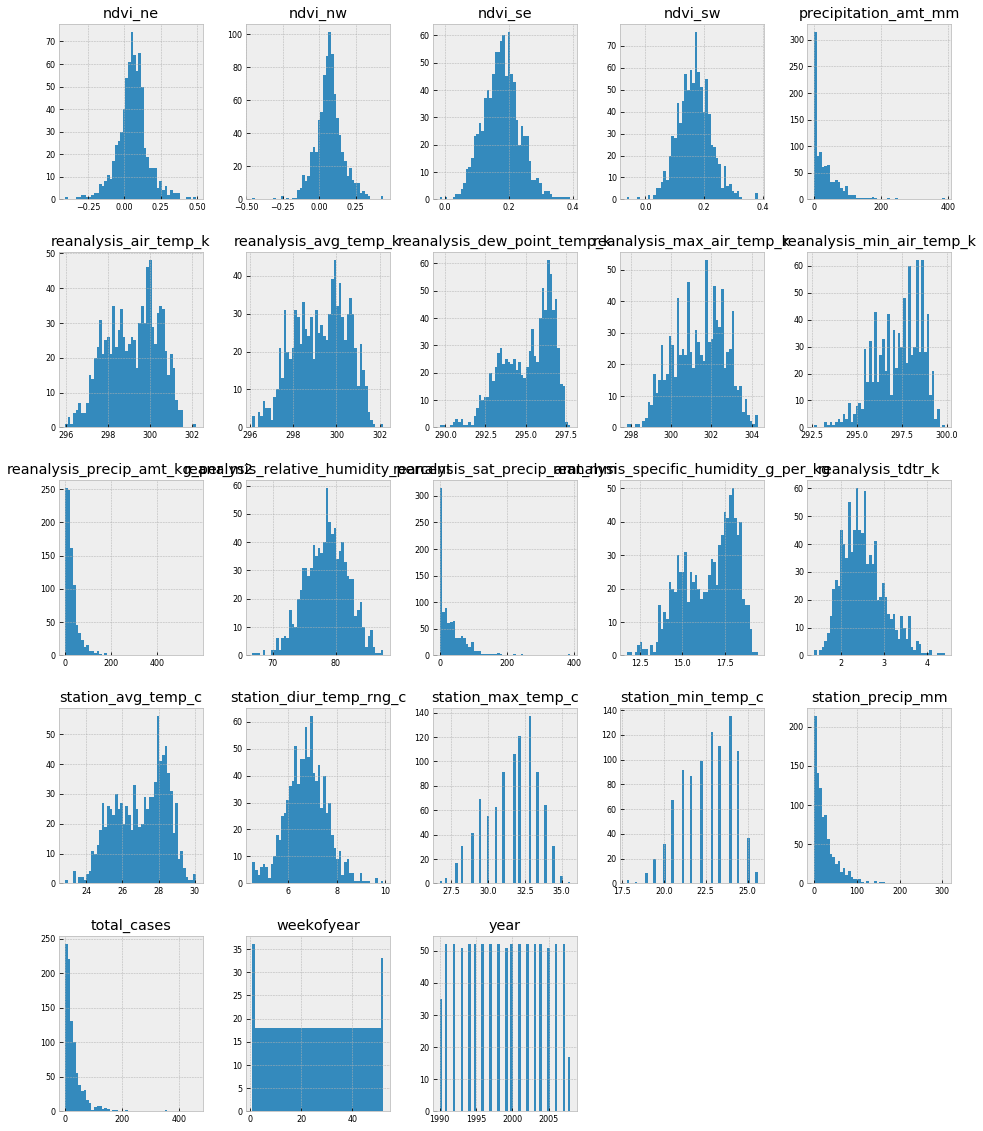

In [117]:
df_num.hist(figsize=(16, 20), bins=50, xlabelsize=8, ylabelsize=8); # ; avoid having the matplotlib verbose informations

### Target Variable: Total Cases

With this information we can see that the total cases of dengue are skewed left and some outliers lies above ~100. We will eventually want to get rid of the them to get a normal distribution of the independent variable (`total_cases`) for machine learning.

Another option is the log transformation.

count    933.000000
mean      34.184352
std       51.451301
min        0.000000
25%        9.000000
50%       19.000000
75%       37.000000
max      461.000000
Name: total_cases, dtype: float64


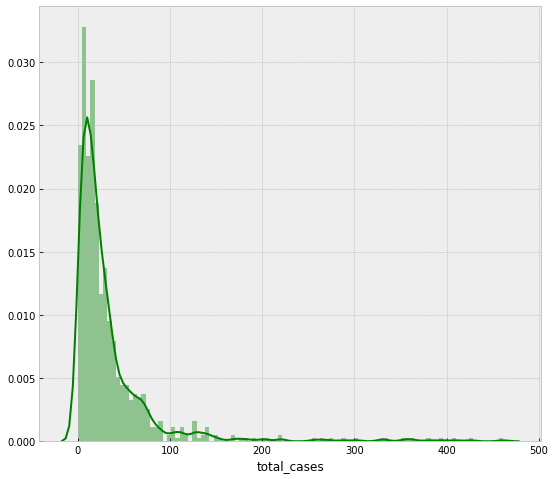

In [118]:
#Selecting one city --> San Juan
df_train_sj=df_train[df_train['city']=='sj']
print(df_train_sj['total_cases'].describe())
plt.figure(figsize=(9, 8))
sns.distplot(df_train_sj['total_cases'], color='g', bins=100, hist_kws={'alpha': 0.4});

### Target Variable: Correlation

Analyzing correlation with the target variable

In [119]:
df_num_corr = df_num.corr()['total_cases'][:-1] # -1 because the latest row is total_cases
golden_features_list = df_num_corr[abs(df_num_corr) > 0.5].sort_values(ascending=False)
print("There is {} strongly correlated values with Total Cases:\n{}".format(len(golden_features_list), golden_features_list))

There is 0 strongly correlated values with Total Cases:
Series([], Name: total_cases, dtype: float64)


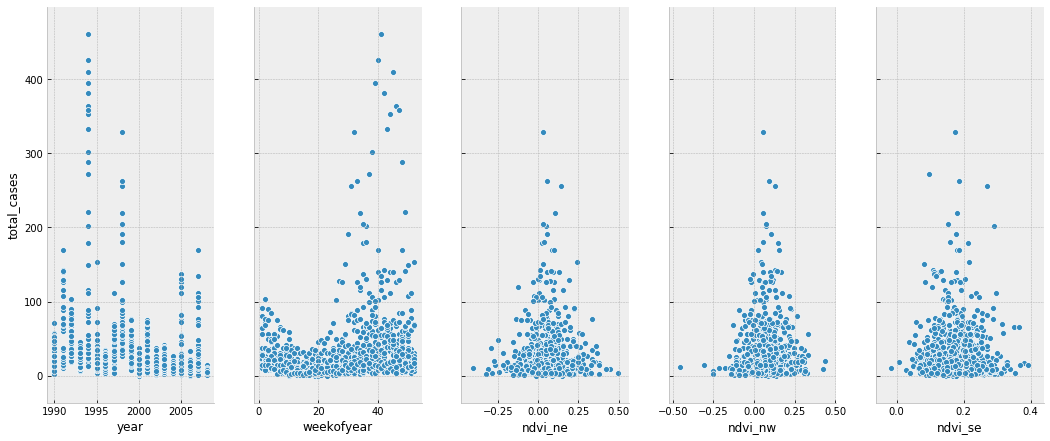

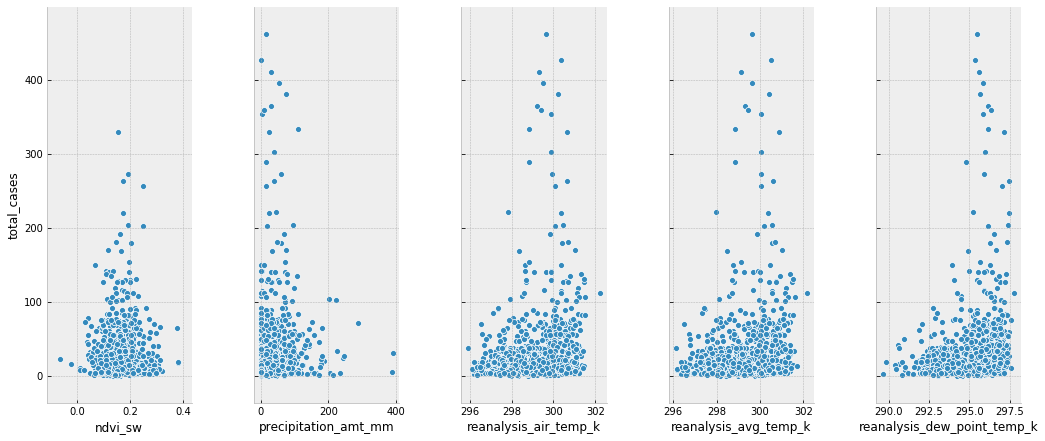

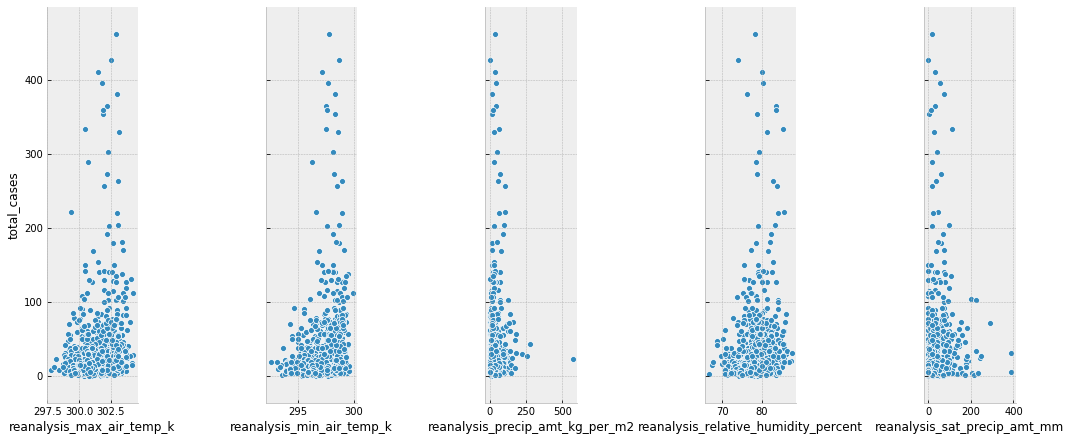

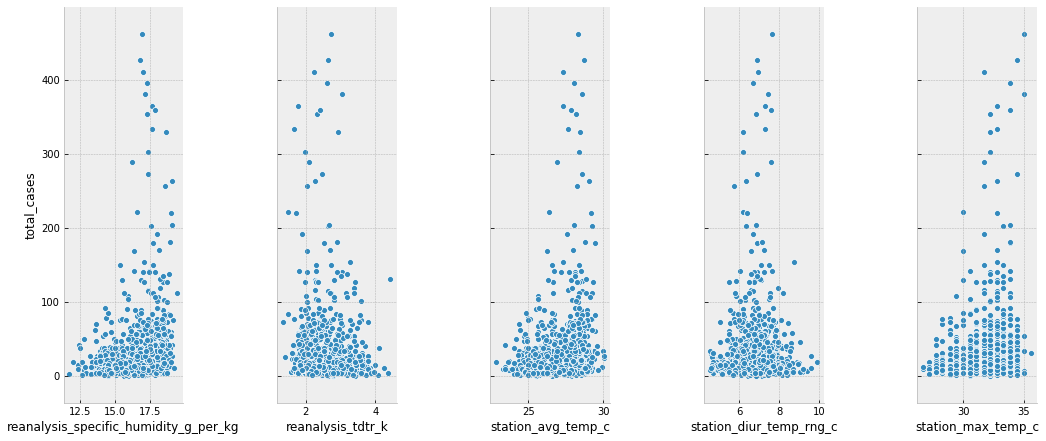

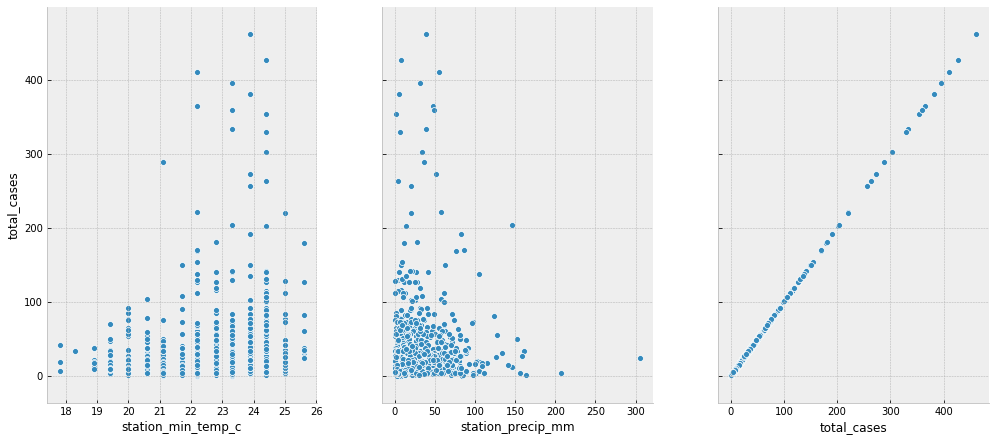

In [120]:
for i in range(0, len(df_num.columns), 5):
    g=sns.pairplot(data=df_num,
                x_vars=df_num.columns[i:i+5],
                y_vars=['total_cases'])
    g.fig.set_size_inches(15,8)

In [121]:
import operator

individual_features_df = []
for i in range(0, len(df_num.columns) - 1): # -1 because the last column is SalePrice
    tmpDf = df_num[[df_num.columns[i], 'total_cases']]
    tmpDf = tmpDf[tmpDf[df_num.columns[i]] != 0]
    individual_features_df.append(tmpDf)

all_correlations = {feature.columns[0]: feature.corr()['total_cases'][0] for feature in individual_features_df}
all_correlations = sorted(all_correlations.items(), key=operator.itemgetter(1))
for (key, value) in all_correlations:
    print("{:>15}: {:>15}".format(key, value))

           year: -0.21256232895549873
reanalysis_tdtr_k: -0.06759992895244536
        ndvi_sw: -0.0003331922111150701
        ndvi_se: 0.001112776981849056
precipitation_amt_mm: 0.004091445734366524
reanalysis_sat_precip_amt_mm: 0.004091445734366524
station_diur_temp_rng_c: 0.03463006792870026
        ndvi_ne: 0.03763946284230521
station_precip_mm: 0.05027605315504646
        ndvi_nw: 0.07530714420074998
reanalysis_precip_amt_kg_per_m2: 0.10678786410910235
reanalysis_relative_humidity_percent: 0.14404469835447406
reanalysis_avg_temp_k: 0.17526745180821834
station_min_temp_c: 0.17701193575978025
reanalysis_air_temp_k: 0.18191694846733078
reanalysis_min_air_temp_k: 0.18794289083152557
station_max_temp_c: 0.1899007313998045
reanalysis_max_air_temp_k: 0.19453181561745608
station_avg_temp_c: 0.19661656049148904
reanalysis_dew_point_temp_k: 0.20377424158815935
reanalysis_specific_humidity_g_per_kg: 0.20794740781198076
     weekofyear: 0.2887852806751831


There is no evidence of strongly correlated variables to the target variable!

###Feature to Feature Relationship

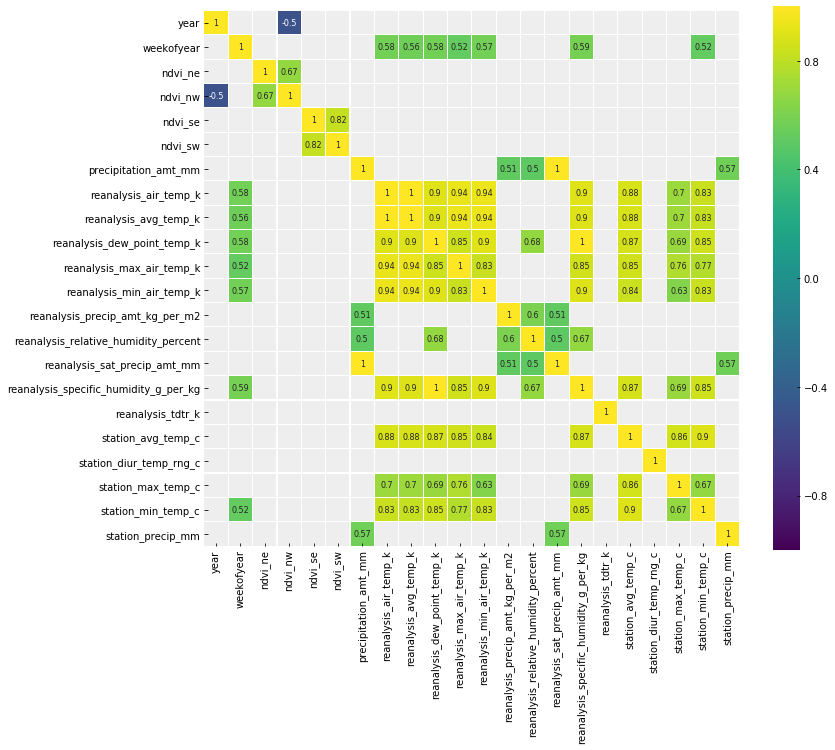

In [122]:
corr = df_num.drop('total_cases', axis=1).corr() # We already examined total_cases correlations
plt.figure(figsize=(12, 10))

sns.heatmap(corr[(corr >= 0.5) | (corr <= -0.4)], 
            cmap='viridis', vmax=1.0, vmin=-1.0, linewidths=0.1,
            annot=True, annot_kws={"size": 8}, square=True);

- **Year-Vegetation** --> negatively correlated, as years go by, vegetation decreases
- **Week-Temperature** --> Clearly correated
- **Temperature-Humidity** --> Clearly correlated


Riprendo tutto il train di entrambe le città: 
Essendo San Juan nell'emisfero boreale e Iquitos nell'emisfero australe, le due città hanno comportamenti completamente opposti per quanto riguarda umidità e precipitazioni. 

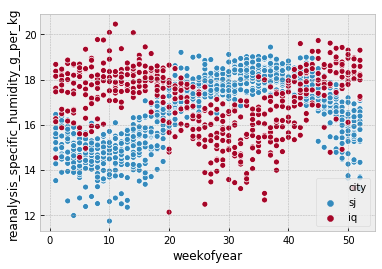

In [123]:
ax=sns.scatterplot(x="weekofyear", y="reanalysis_specific_humidity_g_per_kg",hue="city",data=df_train)

## Seasonality

In [124]:
df_train_sj["week_start_date"]=pd.to_datetime(df_train_sj["week_start_date"], format='%Y-%m-%d')

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


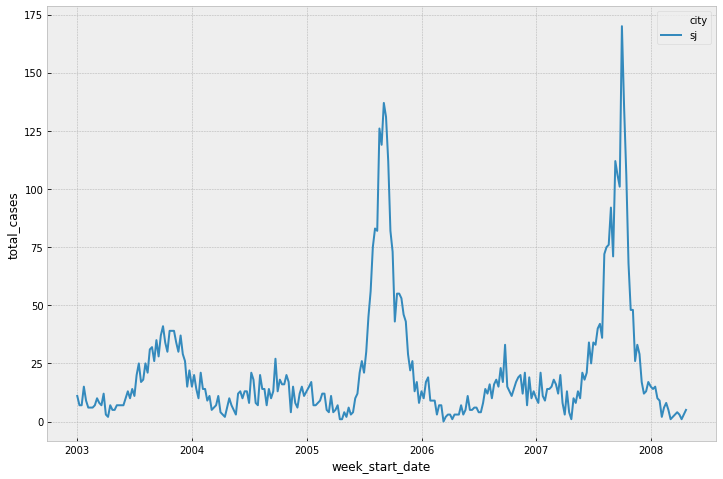

In [137]:
fig, ax = plt.subplots(figsize=(12, 8))
sns.lineplot(x="week_start_date",y="total_cases", hue="city",ax=ax,data=df_train_sj[df_train_sj['year']>=2003])

In [127]:
df_train[df_train['year']>=2008]

,city,year,weekofyear,week_start_date,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,reanalysis_avg_temp_k,reanalysis_dew_point_temp_k,reanalysis_max_air_temp_k,reanalysis_min_air_temp_k,reanalysis_precip_amt_kg_per_m2,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm,total_cases
916,sj,2008,1,2008-01-01,0.000600,-0.309600,0.239814,0.195557,0.00,298.038571,298.121429,293.514286,299.9,296.6,27.99,76.148571,0.00,14.911429,1.842857,25.400000,5.300000,29.4,22.2,55.5,15
917,sj,2008,2,2008-01-08,NaN,-0.108250,0.330486,0.244286,37.24,298.142857,298.228571,293.595714,300.0,296.3,37.66,76.131429,37.24,14.980000,2.057143,24.971429,5.014286,28.3,21.1,64.8,14
918,sj,2008,3,2008-01-15,NaN,0.038300,0.125000,0.108843,0.00,297.627143,297.871429,293.020000,300.1,295.3,4.10,75.642857,0.00,14.488571,3.000000,24.428571,5.628571,27.8,20.6,2.5,15
919,sj,2008,4,2008-01-22,-0.026800,-0.215300,0.112614,0.160214,81.22,297.968571,298.128571,293.635714,299.5,296.4,27.16,77.167143,81.22,15.065714,2.000000,24.528571,4.585714,27.8,21.1,83.1,10
920,sj,2008,5,2008-01-29,NaN,-0.135400,0.223300,0.170943,0.00,298.021429,298.178571,292.957143,300.7,294.3,2.70,73.565714,0.00,14.408571,3.300000,24.571429,6.442857,28.9,20.0,3.1,9
921,sj,2008,6,2008-02-05,-0.111700,-0.003200,0.232843,0.271171,0.00,297.237143,297.278571,291.537143,299.3,295.4,19.70,70.642857,0.00,13.225714,2.071429,24.214286,5.157143,27.2,21.1,35.9,2
922,sj,2008,7,2008-02-12,0.072000,-0.063100,0.150200,0.149271,0.00,297.838571,297.907143,292.941429,299.3,296.5,10.17,74.228571,0.00,14.367143,2.157143,24.800000,6.242857,28.3,21.1,6.4,6
923,sj,2008,8,2008-02-19,-0.138650,-0.095067,0.246057,0.228129,0.00,297.907143,298.057143,293.134286,299.6,296.4,8.30,74.785714,0.00,14.538571,1.885714,24.900000,5.785714,28.3,21.7,13.3,8
924,sj,2008,9,2008-02-26,NaN,0.015420,0.211629,0.117343,0.00,297.765714,298.071429,292.502857,299.9,296.3,6.46,72.660000,0.00,13.967143,2.285714,24.742857,5.500000,27.8,21.1,12.9,5
925,sj,2008,10,2008-03-04,-0.088900,-0.090033,0.223243,0.154186,0.00,297.878571,298.007143,293.052857,299.9,295.5,6.50,74.681429,0.00,14.474286,2.614286,25.114286,6.114286,29.4,21.1,13.0,1
